In [24]:
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
from yahoo_finance import Share
from googlefinance import getQuotes
from pprint import pprint
#import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize":(14,8)})

In [31]:
yahoo = Share('TOBII.ST')
today = str(datetime.datetime.now().date())
hist_data = yahoo.get_historical('2016-01-01', today)

#CHECK IF DATA EXISTS
hist_data[0]

{'Adj_Close': '80.25',
 'Close': '80.25',
 'Date': '2016-09-07',
 'High': '80.25',
 'Low': '78.00',
 'Open': '79.75',
 'Symbol': 'TOBII.ST',
 'Volume': '297400'}

In [18]:
df = pd.DataFrame(hist_data)
df.Date = pd.to_datetime(df.Date)
df = df.set_index('Date')
df = df.ix[:, df.columns != 'Symbol'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 177 entries, 2016-09-06 to 2016-01-01
Data columns (total 6 columns):
Adj_Close    177 non-null float64
Close        177 non-null float64
High         177 non-null float64
Low          177 non-null float64
Open         177 non-null float64
Volume       177 non-null float64
dtypes: float64(6)
memory usage: 9.7 KB


mean daily change:  -0.08192090395480223


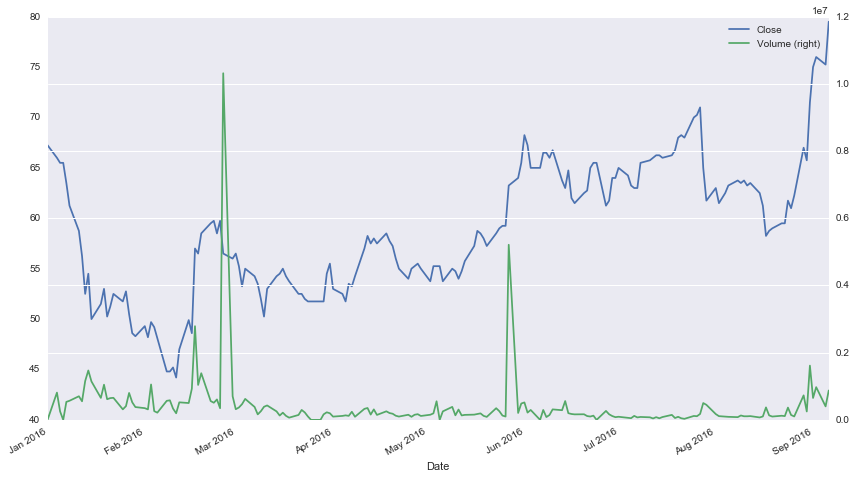

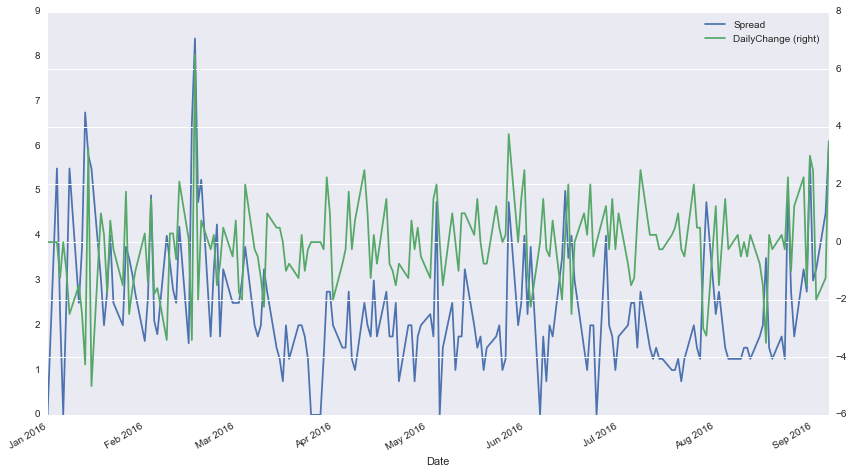

In [19]:
df['Spread'] = df['High']-df['Low']
df['DailyChange'] = df['Close']-df['Open']
df[['Close','Volume']].plot(secondary_y=['Volume'])
sns.plt.figure()
df[['Spread','DailyChange']].plot(secondary_y=['DailyChange'])
print('mean daily change: ',np.mean(df['DailyChange']))
sns.plt.show()

In [28]:
#real time data
getQuotes('STO:TOBII')

[{'ID': '689486707170018',
  'Index': 'STO',
  'LastTradeDateTime': '2016-09-08T17:29:43Z',
  'LastTradeDateTimeLong': 'Sep 8, 5:29PM GMT+2',
  'LastTradePrice': '78.25',
  'LastTradeTime': '5:29PM GMT+2',
  'LastTradeWithCurrency': 'SEK78.25',
  'StockSymbol': 'TOBII'}]